In [1]:
import pandas as pd
import numpy as np
#Visualisation modules
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
X_train=pd.read_csv("train.csv")
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_test=pd.read_csv("test.csv")
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
X_train.info()
print("_"*(40))
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [131]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
X_train.isnull().any().describe()   # from this we can see that 3 columns are having null values

count        12
unique        2
top       False
freq          9
dtype: object

In [132]:
X_train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Miss. Amelia ""Mildred""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


###### we can drop of PassengerId ,Cabin and Ticket as there is no relationship with the Survived,and most of them are unique and no pattern 
###### observed with survived ,For Test data we can keep Passenger ID as we need to predict Survived ,and we can remove the Ticket and cabin

In [133]:
X_train=X_train.drop(['PassengerId','Ticket','Cabin'],axis=1)
X_test=X_test.drop(['Ticket','Cabin'],axis=1)

In [134]:
X_Comb=[X_train,X_test]

In [135]:
X_train[['Survived','Pclass']].groupby(['Pclass'],as_index=False).mean().sort_values('Survived',ascending=True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


#### From the above we can observe there is significant relationship with Survied as Pclass decreases with Survived.

In [136]:
X_train.loc[:,['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values('Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


#### Females have high survival rate than the males.

In [137]:
X_train.loc[:,['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values('Survived',ascending =False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


#### From Above if the Parch decreases then the survival rate changes significantly high 

In [138]:
X_train[['Survived','SibSp']].groupby('Survived',as_index=False).mean().sort_values('Survived',ascending=False)

,Survived,SibSp
1,1,0.473684
0,0,0.553734


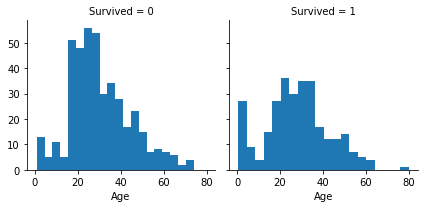

In [139]:
g=sb.FacetGrid(X_train,col='Survived')
g.map(plt.hist,'Age',bins=20)

##### 1)Age around 80 have survival rate
##### 2)Age<4 have high survival rate
##### 3)Medium age has less survival age


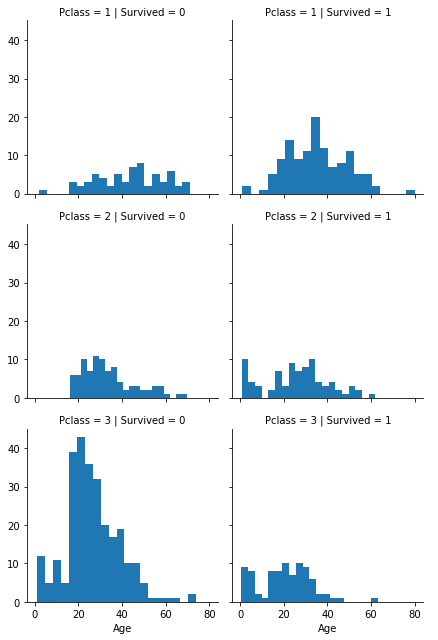

In [140]:
g1=sb.FacetGrid(X_train,col='Survived',row='Pclass')
g1.map(plt.hist,'Age',bins=20)
g1.add_legend()

#### Correlating numerical and ordinal features
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations**

- Pclass 3 has more passengers and has less survival rate.
- Most passengers in Pclass-1 have servived

C:\Users\adity\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\adity\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


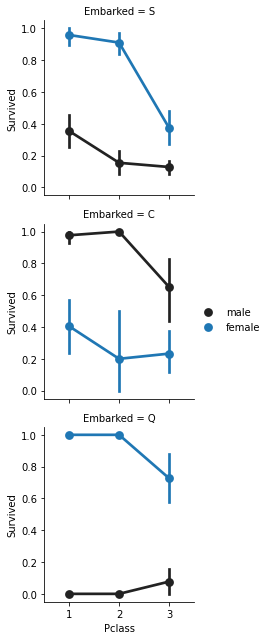

In [141]:
g2=sb.FacetGrid(X_train,row='Embarked')
g2.map(sb.pointplot,'Pclass', 'Survived', 'Sex')
g2.add_legend()

C:\Users\adity\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


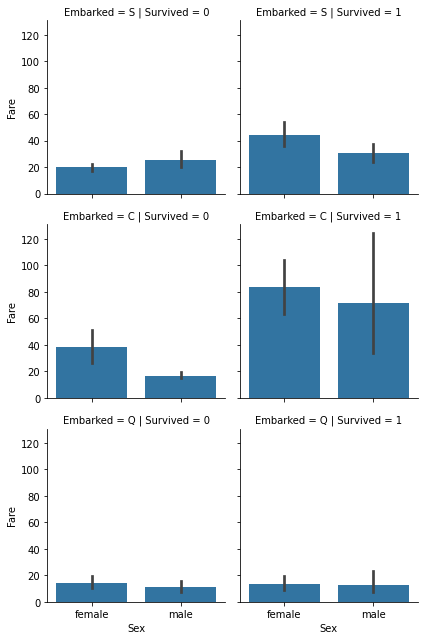

In [142]:
g4=sb.FacetGrid(X_train,col='Survived',row='Embarked')
g4.map(sb.barplot,'Sex','Fare')


**Observations**

- People Embarked at Q have higher Survival rate
- Interestly Male Embarked at S, have higher Survival Rate
- High the fare,High is the Survival Rate

**Decisions**

- Since considerable impact of Embarked and Fare on Suvival,so we can keep for our model prediction



In [125]:
for dataset in X_Comb:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]*)\.',expand=False)

In [144]:
X_Comb

[     Survived  Pclass                                               Name  \
 0           0       3                            Braund, Mr. Owen Harris   
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
 2           1       3                             Heikkinen, Miss. Laina   
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
 4           0       3                           Allen, Mr. William Henry   
 ..        ...     ...                                                ...   
 886         0       2                              Montvila, Rev. Juozas   
 887         1       1                       Graham, Miss. Margaret Edith   
 888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
 889         1       1                              Behr, Mr. Karl Howell   
 890         0       3                                Dooley, Mr. Patrick   
 
         Sex   Age  SibSp  Parch     Fare Embarked  
 0      male  22.0   

In [143]:
X_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [53]:
X_train.isnull().sum(axis=0)
X_test.isnull().sum(axis=0)

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [54]:
X_train['Sex']=X_train['Sex'].map({"male":0,"female":1})
X_test['Sex']=X_test['Sex'].map({"male":0,"female":1})

In [55]:
pd.crosstab(X_train['Title'],X_train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [56]:
for dataset in X_Comb:
    dataset['Title']=dataset['Title'].replace(['Col','Countess','Jonkheer','Rev'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Capt','Don','Dr','Major','Sir'],'Mr')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace(['Mme','Lady'],'Mrs')

In [57]:
X_train[['Survived','Title']].groupby('Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.162571
3,Mrs,0.795276
4,Rare,0.200000


In [58]:
mapping={"Mr":1,"Mrs":2,"Miss":3,"Master":4,"Rare":5}

In [59]:
for dataset in X_Comb:
    dataset['Title']=dataset['Title'].map(mapping)
    dataset['Title']=dataset['Title'].fillna(0)
    

In [60]:
X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [61]:
X_train.isnull().sum(axis=0)
#X_test.isnull().sum(axis=0)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [62]:
guess_ages=np.zeros([2,3])
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [63]:
for dataset in X_Comb:
    for i in range(0,2):
        for j in range(0,3):
            guess_df= dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            #print(age_guess)
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            #print(guess_ages)
    
    
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age' ]= guess_ages[i,j]
            
            
    
X_train.isnull().sum()
X_test.isnull().sum()
       
            

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [64]:
X_train['Age_brand']=pd.cut(X_train['Age'],5)
X_test['Age_brand']=pd.cut(X_test['Age'],5)
X_train[['Age_brand','Survived']].groupby(['Age_brand'],as_index=False).mean()

,Age_brand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [65]:
X_Comb=[X_train,X_test]

In [66]:
for dataset in X_Comb:
    dataset.loc[dataset['Age'] <=16 ,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
X_train.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_brand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,C,2,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,S,3,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,S,2,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [67]:
X_train = X_train.drop(['Age_brand'], axis=1)
X_test = X_test.drop(['Age_brand'], axis=1)
combine = [X_train, X_test]


In [68]:
for dataset in X_Comb:
    dataset['FamilySize']=dataset['SibSp'] + dataset['Parch'] + 1

In [69]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

X_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [70]:
freq_port = X_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [71]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
X_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [72]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

X_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,0,1,3.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,1,2,2.0
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,0,3,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,0,2,2.0
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,0,1,6.0


In [73]:
X_test['Fare'].fillna(X_test['Fare'].dropna().median(), inplace=True)
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,"Kelly, Mr. James",0,2.0,0,0,7.8292,2,1.0,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,7.0000,0,2.0,6.0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,9.6875,2,1.0,6.0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,8.6625,0,1.0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,12.2875,0,2.0,3.0


In [74]:
X_train['FareBand'] = pd.qcut(X_train['Fare'], 4)
X_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [75]:
X_Comb = [X_train, X_test]

In [76]:
for dataset in X_Comb:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


In [77]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,"Kelly, Mr. James",0,2.0,0,0,0,2,1.0,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,0,0,2.0,6.0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,1,2,1.0,6.0
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,1,0,1.0,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,1,0,2.0,3.0


In [78]:

X_train = X_train.drop(['Name'], axis=1)
X_test = X_test.drop(['Name'], axis=1)

combine = [X_train, X_test]
    
X_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FareBand
0,0,3,0,1.0,1,0,0,0,1,3.0,"(-0.001, 7.91]"
1,1,1,1,2.0,1,0,3,1,2,2.0,"(31.0, 512.329]"
2,1,3,1,1.0,0,0,1,0,3,3.0,"(7.91, 14.454]"
3,1,1,1,2.0,1,0,3,0,2,2.0,"(31.0, 512.329]"
4,0,3,0,2.0,0,0,1,0,1,6.0,"(7.91, 14.454]"
5,0,3,0,1.0,0,0,1,2,1,3.0,"(7.91, 14.454]"
6,0,1,0,3.0,0,0,3,0,1,3.0,"(31.0, 512.329]"
7,0,3,0,0.0,3,1,2,0,4,0.0,"(14.454, 31.0]"
8,1,3,1,1.0,0,2,1,0,2,3.0,"(7.91, 14.454]"
9,1,2,1,0.0,1,0,2,1,2,0.0,"(14.454, 31.0]"


In [79]:
X_train=X_train.drop(['FareBand'],1)
X_train['Age']=X_train['Age'].astype(int)
X_train['Age*Class']=X_train['Age*Class'].astype(int)


In [80]:
X_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,0,3,0,1,1,0,0,0,1,3
1,1,1,1,2,1,0,3,1,2,2


In [81]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,892,3,0,2.0,0,0,0,2,1.0,6.0
1,893,3,1,2.0,1,0,0,0,2.0,6.0
2,894,2,0,3.0,0,0,1,2,1.0,6.0
3,895,3,0,1.0,0,0,1,0,1.0,3.0
4,896,3,1,1.0,1,1,1,0,2.0,3.0


In [82]:
X_Comb=[X_train,X_test]

In [83]:
for dataset in X_Comb:
    dataset['Family_Rel']=dataset['SibSp']+dataset['Parch']+1

In [84]:
X_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,Family_Rel
0,0,3,0,1,1,0,0,0,1,3,2
1,1,1,1,2,1,0,3,1,2,2,2


In [85]:
X_train[['Survived','Family_Rel']].groupby('Family_Rel',as_index=False).mean()

,Family_Rel,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [86]:
def func(x):
    if x==1:
        return 0
    else :
        return 1

In [87]:
X_train['IsAlone']=X_train['Family_Rel'].apply(lambda x : func(x))

In [88]:
X_test['IsAlone']=X_test['Family_Rel'].apply(lambda x : func(x))

In [89]:
X_test['Age']=X_test['Age'].astype('int')
X_test['Title']=X_test['Title'].astype('int')
X_test['Age*Class']=X_test['Age*Class'].astype('int')

In [90]:
X_train=X_train.drop(['SibSp','Parch','Family_Rel'],axis=1)

In [91]:
X_train.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,0,3,0,1,0,0,1,3,1
1,1,1,1,2,3,1,2,2,1


In [92]:
X_test=X_test.drop(['SibSp','Parch','Family_Rel'],axis=1)

In [93]:
X_test.head(2)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,892,3,0,2,0,2,1,6,0
1,893,3,1,2,0,0,2,6,1


In [94]:
X_train.isna().sum()
X_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Age*Class      0
IsAlone        0
dtype: int64

**Modeling**

In [95]:
Y_train = X_train["Survived"]

X_train = X_train.drop("Survived", axis=1)


In [96]:
X_test1  = X_test.drop("PassengerId", axis=1).copy()

#X_train.shape, Y_train.shape, X_test.shape

In [97]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test1)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.35

In [98]:
X=pd.DataFrame(X_train.columns)
X.columns=["Feature"]
X["Correlation"]=pd.Series(logreg.coef_[0])
X

,Feature,Correlation
0,Pclass,-0.877576
1,Sex,2.085563
2,Age,0.197891
3,Fare,-0.071463
4,Embarked,0.249857
5,Title,0.372070
6,Age*Class,-0.217740
7,IsAlone,0.023146


In [99]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.34

In [100]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.18

In [101]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.73

In [102]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.24

In [103]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.42

In [104]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred1 = random_forest.predict(X_test1)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


86.42

In [105]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
               acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.42
6,Decision Tree,86.42
1,KNN,84.18
2,Logistic Regression,79.35
5,Linear SVC,79.24
0,Support Vector Machines,78.34
4,Naive Bayes,72.73


In [106]:
Submissions=pd.DataFrame({"Passenger_ID":X_test["PassengerId"],"Survived":Y_pred1})

In [107]:
Submissions.head()

,Passenger_ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [108]:
Submissions.to_csv("Submissions.csv",index=False)